# Assignment 1 : Applied statistics


## Task 1: Import the necessary libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Task 2: Read the data as a dataframe

In [2]:
myfile = "insurance.csv"
mydata = pd.read_csv(myfile)
mydata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Task 3: Perform basic EDA which should include the following and print out your insights at every step

### Task 3a: Shape of the data

In [3]:
mydata.shape

(1338, 7)

### Task 3b: Data type of each attribute

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Task 3c: Checking the presence of missing values

In [5]:
mydata.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Task 3d: 5 point summary of numerical attributes

In [6]:
#changing the data type of children to category so that the describe result does not include children
mydata['children'] = mydata['children'].astype('category')
mydata.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


### Task 3e: Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

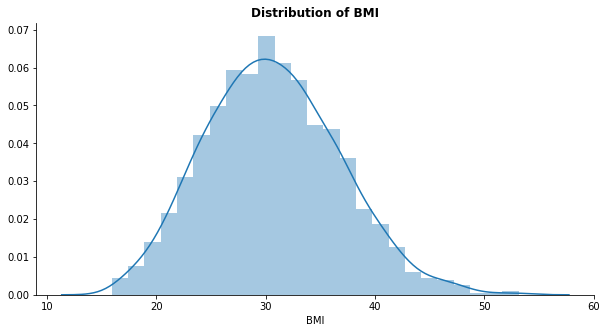

In [7]:
g=sns.distplot(mydata['bmi'])
plt.title('Distribution of BMI',fontweight="bold")
sns.despine()
g.set_xlabel("BMI",fontsize=10)
plt.gcf().set_size_inches(10, 5)

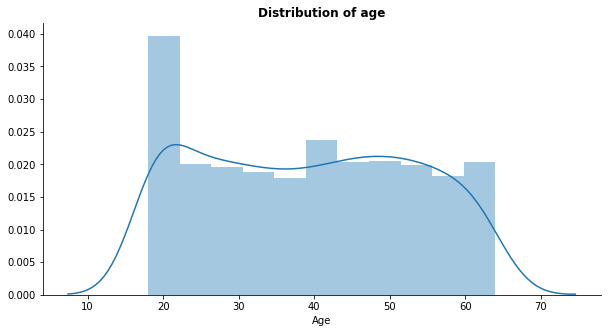

In [8]:
g=sns.distplot(mydata['age'])
plt.title('Distribution of age',fontweight="bold")
sns.despine()
g.set_xlabel("Age",fontsize=10)
plt.gcf().set_size_inches(10, 5)

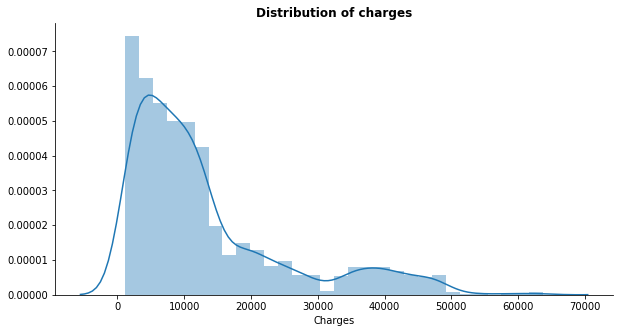

In [9]:
g=sns.distplot(mydata['charges'])
plt.title('Distribution of charges',fontweight="bold")
sns.despine()
g.set_xlabel("Charges",fontsize=10)
plt.gcf().set_size_inches(10, 5)

### Task 3f: Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [10]:
print('Skewness of bmi data = %1.2f' %(stats.skew(mydata['bmi'])))

Skewness of bmi data = 0.28


In [11]:
print('Skewness of age data= %1.2f' %(stats.skew(mydata['age'])))

Skewness of age data= 0.06


In [12]:
print('Skewness of charges data= %1.2f' %(stats.skew(mydata['charges'])))

Skewness of charges data= 1.51


In [13]:
mydata.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

### Task 3g: Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

In [14]:
# creating a function to give lower bound and upper bound for any given column
def calcoutlier (col):
    mydata.sort_values(col)
    q1 = np.percentile(mydata[col],25)
    q3 = np.percentile(mydata[col],75)
    iqr = q3-q1
    LB = q1-(1.5*iqr)
    UB = q3+(1.5*iqr)
    print (col,'data points outside of the range',LB,'to',UB,'are outliers. Also highlighted in the boxplot below')
    return;

    

In [15]:
calcoutlier('bmi')

bmi data points outside of the range 13.7 to 47.290000000000006 are outliers. Also highlighted in the boxplot below


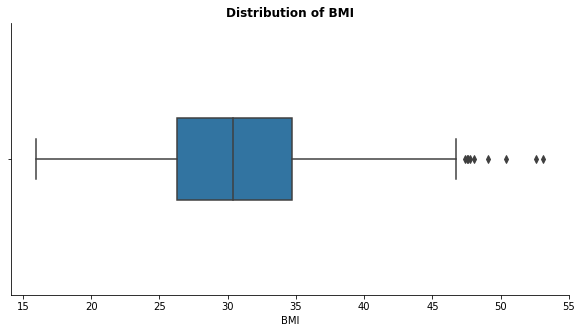

In [16]:
g=sns.boxplot(x = mydata['bmi'], data = mydata,width=.3)
plt.title('Distribution of BMI',fontweight="bold")
sns.despine()
g.set_xlabel("BMI",fontsize=10)
plt.gcf().set_size_inches(10, 5)

In [17]:
calcoutlier('age')

age data points outside of the range -9.0 to 87.0 are outliers. Also highlighted in the boxplot below


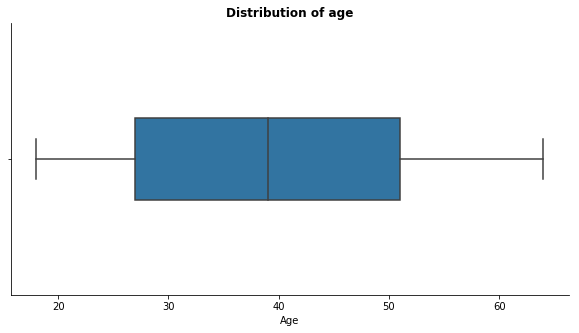

In [18]:
g=sns.boxplot(x = mydata['age'], data = mydata,width=.3)
plt.title('Distribution of age',fontweight="bold")
sns.despine()
g.set_xlabel("Age",fontsize=10)
plt.gcf().set_size_inches(10, 5)

In [19]:
calcoutlier('charges')

charges data points outside of the range -13109.1508975 to 34489.350562499996 are outliers. Also highlighted in the boxplot below


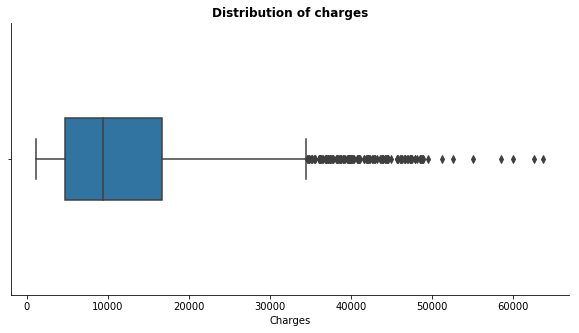

In [20]:
g=sns.boxplot(x = mydata['charges'], data = mydata,width=.3)
plt.title('Distribution of charges',fontweight="bold")
sns.despine()
g.set_xlabel("Charges",fontsize=10)
plt.gcf().set_size_inches(10, 5)

### Task 3h: Distribution of categorical columns (include children)

In [21]:
mydata['region'] = mydata['region'].astype('category')
mydata['smoker'] = mydata['smoker'].astype('category')
mydata['sex'] = mydata['sex'].astype('category')

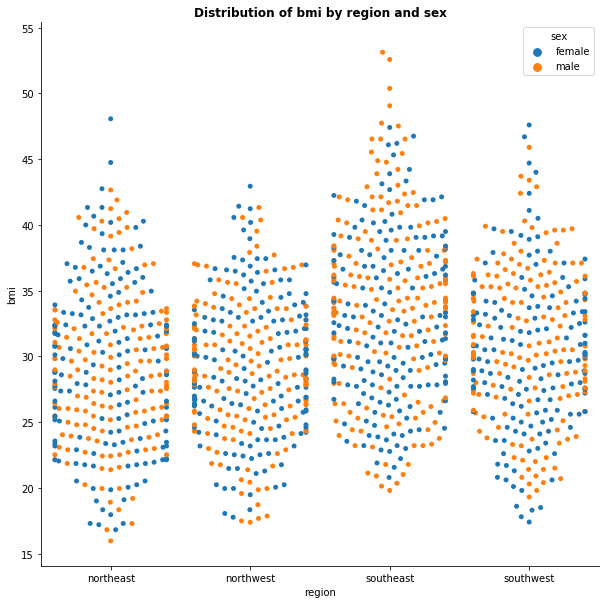

In [22]:
g=sns.swarmplot(mydata['region'],mydata['bmi'],hue ='sex',data=mydata)
plt.title('Distribution of bmi by region and sex',fontweight="bold")
sns.despine()
plt.gcf().set_size_inches(10, 10)

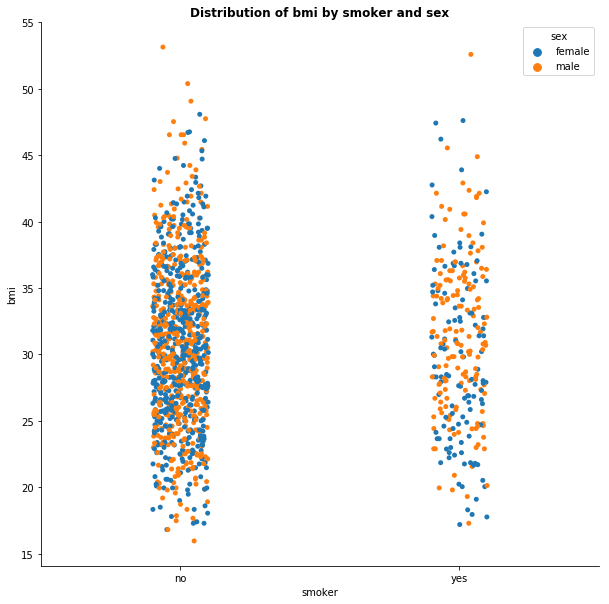

In [64]:
g=sns.stripplot(mydata['smoker'],mydata['bmi'],hue ='sex',data=mydata)
plt.title('Distribution of bmi by smoker and sex',fontweight="bold")
sns.despine()
plt.gcf().set_size_inches(10, 10)

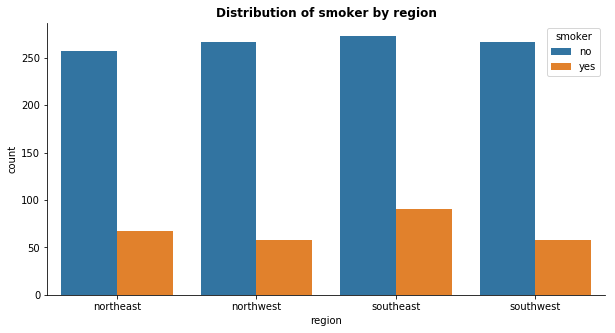

In [72]:
g=sns.countplot(mydata['region'],hue ='smoker',data=mydata)
plt.title('Distribution of smoker by region',fontweight="bold")
sns.despine()
plt.gcf().set_size_inches(10, 5)

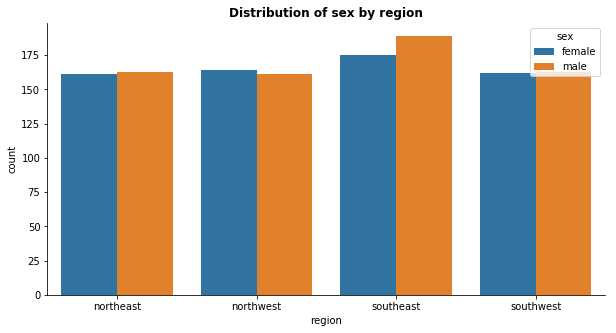

In [67]:
g=sns.countplot(mydata['region'],hue ='sex',data=mydata)
plt.title('Distribution of sex by region',fontweight="bold")
sns.despine()
plt.gcf().set_size_inches(10, 5)

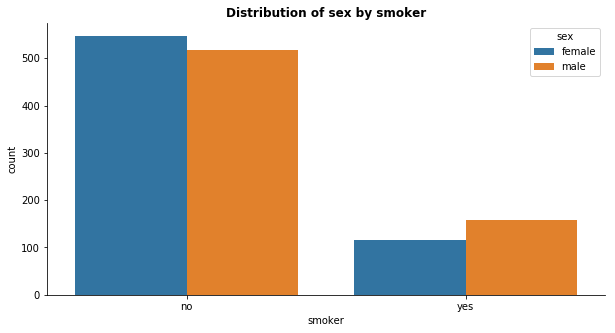

In [71]:
g=sns.countplot(mydata['smoker'],hue ='sex',data=mydata)
plt.title('Distribution of sex by smoker',fontweight="bold")
sns.despine()
plt.gcf().set_size_inches(10, 5)

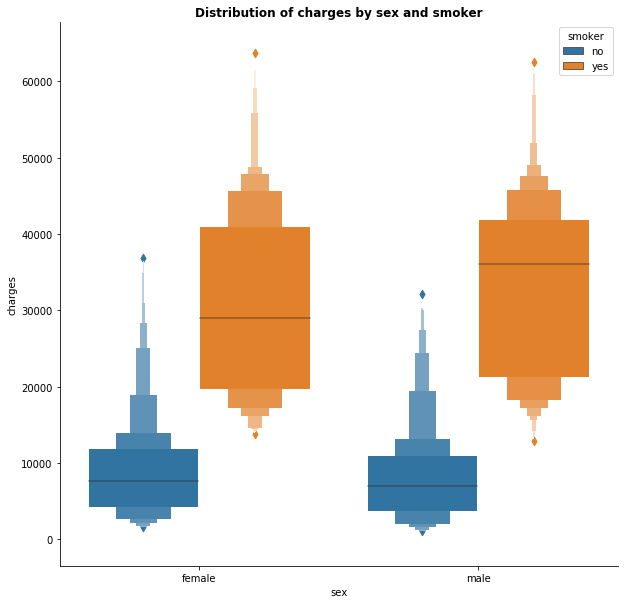

In [25]:
g=sns.boxenplot(mydata['sex'],mydata['charges'],hue='smoker',data=mydata)
plt.title('Distribution of charges by sex and smoker',fontweight="bold")
sns.despine()
plt.gcf().set_size_inches(10, 10)

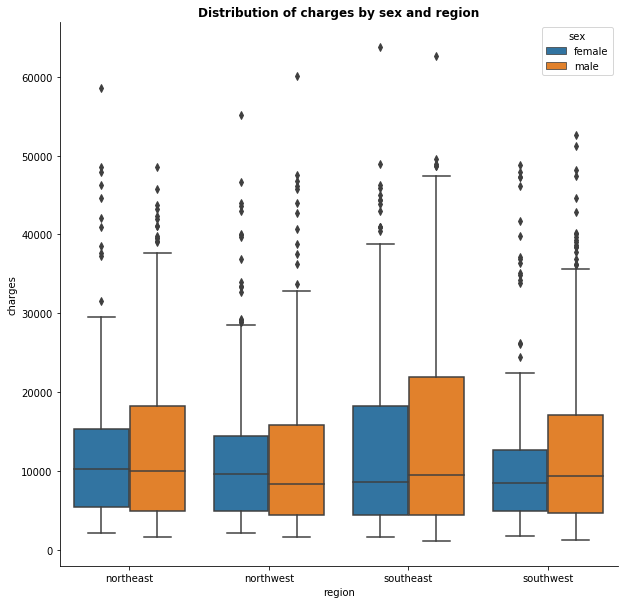

In [26]:
g=sns.boxplot(mydata['region'],mydata['charges'],hue='sex',data=mydata)
plt.title('Distribution of charges by sex and region',fontweight="bold")
sns.despine()
plt.gcf().set_size_inches(10, 10)

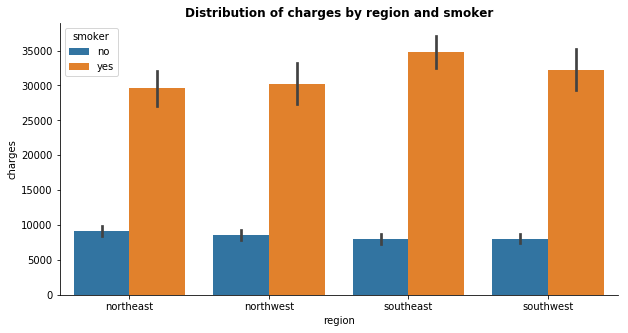

In [27]:
g=sns.barplot(mydata['region'],mydata['charges'],hue='smoker',data=mydata,linewidth=1)
plt.title('Distribution of charges by region and smoker',fontweight="bold")
sns.despine()
plt.gcf().set_size_inches(10, 5)

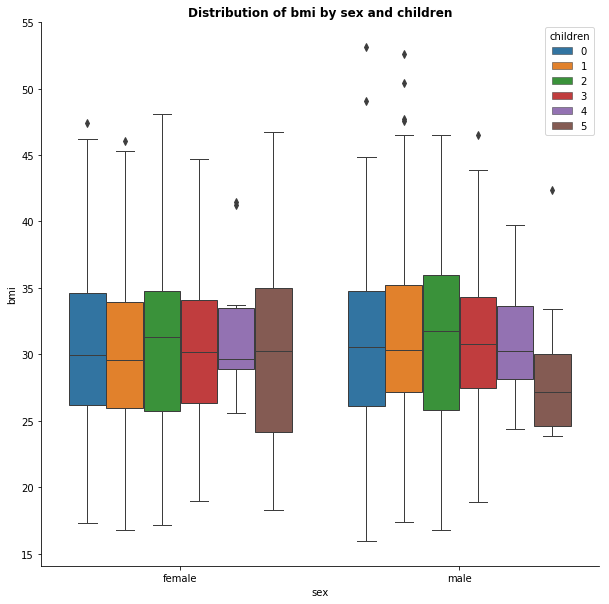

In [28]:
g=sns.boxplot(mydata['sex'],mydata['bmi'],hue='children',data=mydata,linewidth=1)
plt.title('Distribution of bmi by sex and children',fontweight="bold")
sns.despine()
plt.gcf().set_size_inches(10, 10)

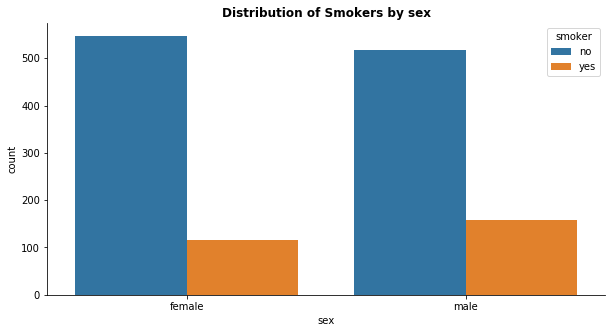

In [70]:
g=sns.countplot(x=mydata['sex'],hue='smoker',data=mydata)
plt.title('Distribution of Smokers by sex',fontweight="bold")
sns.despine()
plt.gcf().set_size_inches(10, 5)

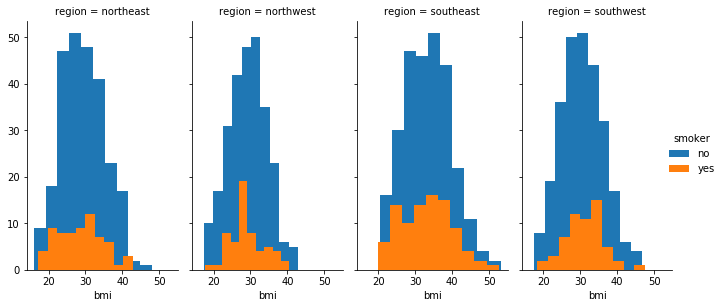

In [30]:
g = sns.FacetGrid(mydata, col="region",  hue="smoker")
g.map(plt.hist, "bmi")
g.add_legend()
sns.despine()
plt.gcf().set_size_inches(10, 5)

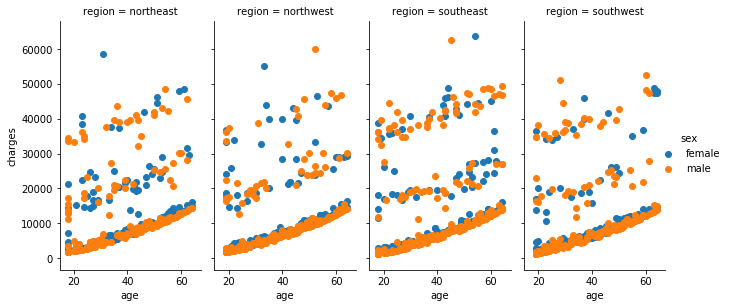

In [77]:
g = sns.FacetGrid(mydata, col="region",  hue="sex")
g.map(plt.scatter, "age","charges")
g.add_legend()
sns.despine()
plt.gcf().set_size_inches(10, 5)

### Task 3i: Pair plot that includes all the columns of the data frame  

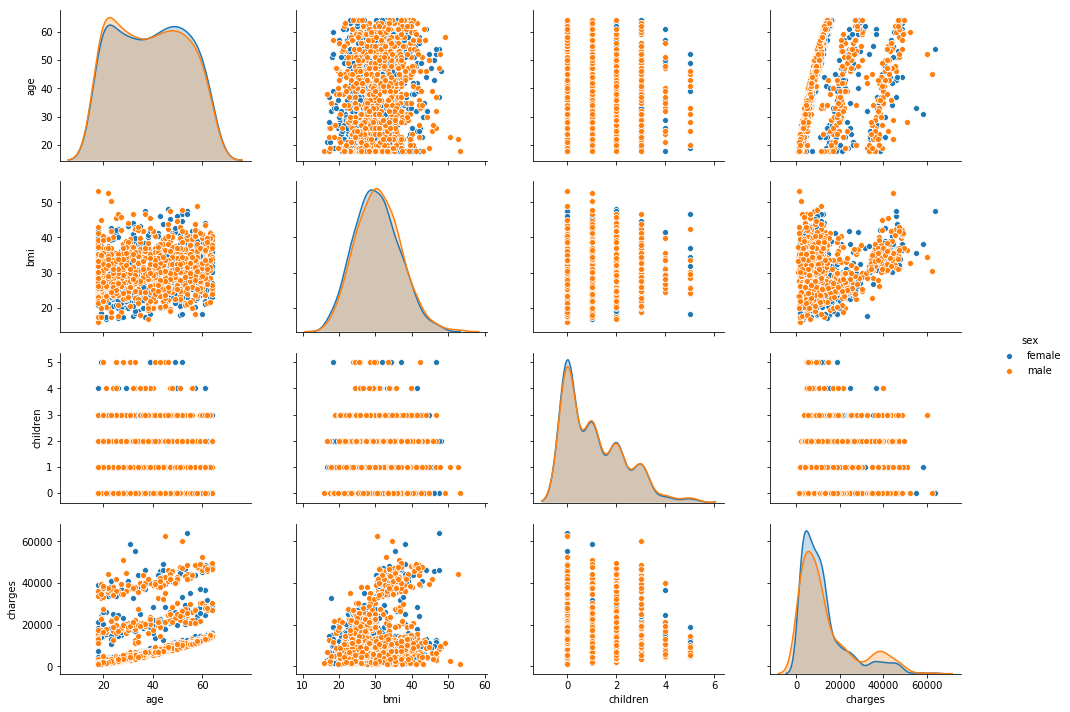

In [32]:
sns.pairplot(data=mydata,hue='sex')
sns.despine()
plt.gcf().set_size_inches(15, 10)

## Task 4:Answers for the following questions with statistical evidence

### Task 4a:Do charges of people who smoke differ significantly from the people who don't?

In [33]:
##Hypothessis setting:
#H0 = Charges of people who smoke does not differ significantly from the people who do not smoke
#Ha = Charges of people who smoke differs significantly from the people who do not smoke


smokers =  mydata[mydata['smoker']=='yes']['charges']
nonsmokers = mydata[mydata['smoker']=='no']['charges']


In [34]:
smokers.head()

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

In [35]:
nonsmokers.head()


1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [36]:

# Testing 4a using two sample t test

In [37]:
t_statistic, p_value = stats.ttest_ind(smokers,nonsmokers)

print('t statistic =',t_statistic)
print('p value = %1.2f' %(p_value))


t statistic = 46.664921172723716
p value = 0.00


In [38]:
#since p value is less than 0.05, H0 is rejected.Ha is accepted.Hence Charges of people who smoke differs 
#significantly from the people who do not smoke

In [39]:

# Testing 4a using Mann Whitney U test

In [40]:
u,p_value = stats.mannwhitneyu(smokers,nonsmokers)

print('u =',u)
print('p value = %1.2f' %(p_value))

u = 7403.0
p value = 0.00


In [41]:
#since p value is less than 0.05, H0 is rejected.Ha is accepted.Hence Charges of people who smoke differs 
#significantly from the people who do not smoke

In [42]:
# calculation of size effect

mean1 = smokers.mean()
mean2 = nonsmokers.mean()
n1 = len(smokers)
n2 = len(nonsmokers)
var1 = smokers.var()
var2 = nonsmokers.var()
sdpooled_a = np.sqrt((var1 + var2)/2)
sdpooled_b = np.sqrt(((((n1-1)*var1) + ((n2-1)*var2)))/(n1+n2-2))
d_a = (mean1 - mean2)/sdpooled_a
d_b = (mean1 - mean2)/sdpooled_b
print ('Size effect based on SD pool base formula:', d_a,'Size effect based on SD pool alternative formula:',d_b)

Size effect based on SD pool base formula: 2.5680698712414642 Size effect based on SD pool alternative formula: 3.1613494007377874


In [43]:
# calculation of power analysis

power_analysis = TTestIndPower()
power_value = power_analysis.power(d_b,n1,alpha = 0.05 )
print('Power value:',power_value)

Power value: 1.0


### Task 4b: Does bmi of males differ significantly from that of females

In [44]:
##Hypothessis setting:
#H0 = bmi of males does not differ significantly from that of females
#Ha = bmi of males differs significantly from that of females


bmimales =  mydata[mydata['sex']=='male']['bmi']
bmifemales = mydata[mydata['sex']=='female']['bmi']

In [45]:
bmimales.head()

1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64

In [46]:
bmifemales.head()

0    27.90
5    25.74
6    33.44
7    27.74
9    25.84
Name: bmi, dtype: float64

In [47]:

# Testing 4b using two sample t test

In [48]:
t_statistic, p_value = stats.ttest_ind(bmimales,bmifemales)

print('t statistic =',t_statistic)
print('p value = %1.2f' %(p_value))



t statistic = 1.696752635752224
p value = 0.09


In [49]:
#since p value is greater than 0.05, H0 is accepted.Ha is rejected.Hence bmi of males does not differ significantly from that of females

In [50]:
# Testing 4b using Mann Whitney U test

In [51]:
u,p_value = stats.mannwhitneyu(bmimales,bmifemales)

print('u =',u)
print('p value = %1.2f' %(p_value))

u = 212180.0
p value = 0.05


### Task 4c:Is the proportion of smokers significantly different in different genders

In [52]:
##Hypothessis setting:
#H0 = proportion of smokers does not significantly differ in different genders
#Ha = proportion of smokers is significantly different in different genders

In [53]:
## Testing of proportion using Chi square

In [54]:
cont = pd.crosstab(mydata['smoker'],mydata['sex'])
print(cont)

sex     female  male
smoker              
no         547   517
yes        115   159


In [55]:
chi2,p,df,expected = stats.chi2_contingency(cont)

print ('test statistic:',chi2)
print ('p value = %1.2f' %(p))
print ('degree of freedom:',df)
print ('expected values',expected)

test statistic: 7.39291081459996
p value = 0.01
degree of freedom: 1
expected values [[526.43348281 537.56651719]
 [135.56651719 138.43348281]]


In [56]:
## Since the p value = 0.01 is less than 0.05, H0 is rejected. 
##Hence proportion of smokers is significantly different in different genders

### Test 4d: Is the distribution of bmi across women with no children, one child and two children,the same

In [57]:
mydata['children'] = mydata['children'].astype('int64')
childrens = [0,1,2]
filter1 = mydata.sex =='female'
filter2 = mydata.children.isin(childrens)
bmifemale = mydata[filter1 & filter2]

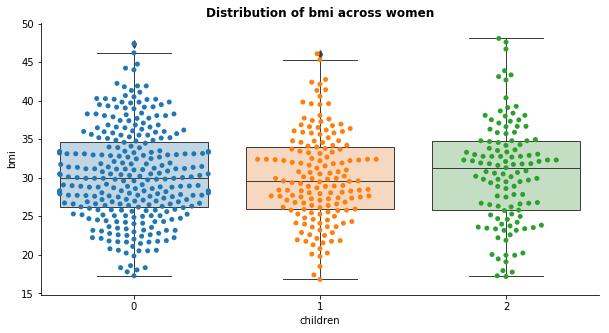

In [58]:
fig=sns.boxplot(x=bmifemale['children'],y=bmifemale['bmi'],data = bmifemale,linewidth=1)
fig=sns.swarmplot(x=bmifemale['children'],y=bmifemale['bmi'],data = bmifemale)
plt.title('Distribution of bmi across women',fontweight="bold")
for patch in fig.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))

sns.despine()
plt.gcf().set_size_inches(10, 5)

In [59]:
##Hypothessis setting:
#H0 = distribution of bmi across women with no children, one child and two children are same 
#(i.e.not statistically significantly different)
#Ha = distribution of bmi across women with no children, one child and two children are not same


In [60]:
## Testing using 1 way Anova

In [61]:
formula = 'bmi ~ C(children)'
model = ols(formula,bmifemale).fit()
anova_table = anova_lm(model)
print(anova_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


In [62]:
# since p value is > 0.05 Ho is accepted. 
# Distribution of bmi across women with no children, one child and two children are not statistically significantly different